 No rules left for heatmap!


<ipython-input-4-f19c5d47cbd6>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frequent_itemsets["support"].head(10),


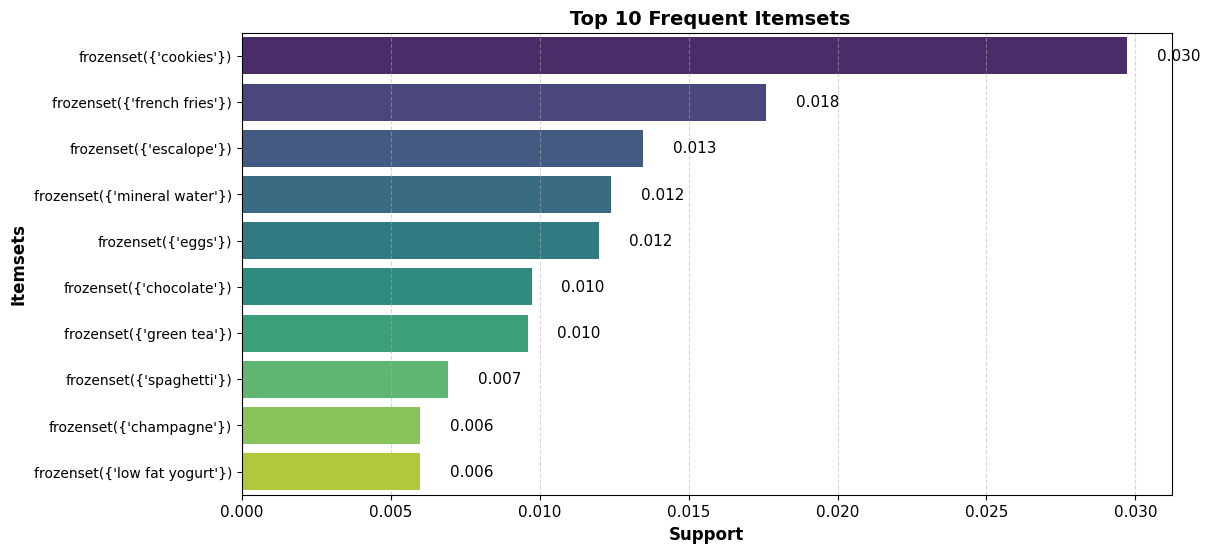

 No edges to plot in the network graph!


In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

# ================================
#  1. DATA LOADING & PREPROCESSING
# ================================
df = pd.read_excel('Online retail.xlsx', header=None)

# Convert transactions (comma-separated) into lists
transactions = df.apply(lambda x: x.dropna().tolist(), axis=1).tolist()

# Convert transactions into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_ary, columns=te.columns_)

# ================================
#  2. ASSOCIATION RULE MINING
# ================================
frequent_itemsets = apriori(basket, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Apply Filtering
rules = rules[(rules['support'] > 0.001) & (rules['confidence'] > 0.05)]

# ================================
#  3. ENHANCED VISUALIZATIONS
# ================================

# ** 1. Enhanced Heatmap**
if not rules.empty:
    plt.figure(figsize=(9, 7))
    sns.heatmap(rules[['support', 'confidence', 'lift']].corr(),
                annot=True, cmap='coolwarm', linewidths=1, linecolor='black')
    plt.title(" Correlation Between Support, Confidence & Lift", fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
else:
    print(" No rules left for heatmap!")

# ** 2. Improved Bar Chart for Frequent Itemsets**
if not frequent_itemsets.empty:
    frequent_itemsets.sort_values(by="support", ascending=False, inplace=True)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=frequent_itemsets["support"].head(10),
                     y=frequent_itemsets["itemsets"].head(10).astype(str),
                     palette="viridis")

    plt.xlabel("Support", fontsize=12, fontweight='bold')
    plt.ylabel("Itemsets", fontsize=12, fontweight='bold')
    plt.title(" Top 10 Frequent Itemsets", fontsize=14, fontweight='bold')

    # Add value labels
    for index, value in enumerate(frequent_itemsets["support"].head(10)):
        ax.text(value + 0.001, index, f"{value:.3f}", va='center', fontsize=11)

    plt.xticks(fontsize=11)
    plt.yticks(fontsize=10, rotation=0)  # Ensure readable labels
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()
else:
    print(" No frequent itemsets to plot!")

# ** 3. Improved Network Graph for Association Rules**
if not rules.empty:
    G = nx.DiGraph()

    # Create edges with weights based on lift
    for _, row in rules.iterrows():
        antecedents = ', '.join(row['antecedents'])
        consequents = ', '.join(row['consequents'])
        G.add_edge(antecedents, consequents, weight=row['lift'])

    # Position nodes using spring layout
    plt.figure(figsize=(12, 7))
    pos = nx.spring_layout(G, k=0.5, seed=42)

    # Draw nodes & edges
    node_sizes = [G.degree(n) * 500 for n in G.nodes()]  # Size nodes based on connections
    edge_weights = [G[u][v]['weight'] * 2 for u, v in G.edges()]  # Thickness based on lift

    nx.draw(G, pos, with_labels=True,
            node_color='skyblue', node_size=node_sizes,
            edge_color=edge_weights, edge_cmap=plt.cm.Blues,
            width=edge_weights, font_size=10, alpha=0.8)

    # Add edge labels (lift values)
    edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    plt.title(" Association Rules Network Graph", fontsize=14, fontweight='bold')
    plt.show()
else:
    print(" No edges to plot in the network graph!")


## Interview Questions:
What is lift and why is it important in Association rules?

Lift is a measure of how much more likely the consequent is to occur with the antecedent than without it. It is important because it indicates the strength of the relationship between two items. A lift greater than 1 suggests that the items are positively correlated, while a lift less than 1 suggests a negative correlation.
What is support and confidence? How do you calculate them?

Support is the proportion of transactions that contain both the antecedent and consequent items. It is calculated as:
Support
=
Number of transactions containing both items
Total number of transactions
Support=
Total number of transactions
Number of transactions containing both items
​

Confidence is the probability that the consequent item is purchased when the antecedent item is purchased. It is calculated as:
Confidence
=
Support of antecedent and consequent
Support of antecedent
Confidence=
Support of antecedent
Support of antecedent and consequent
​

What are some limitations or challenges of Association rules mining?

Scalability: The algorithm can be computationally expensive, especially for large datasets with many items.
Quality of Rules: Association rule mining can generate a large number of rules, many of which might not be meaningful or actionable.
Threshold Selection: The choice of thresholds for support, confidence, and lift can greatly impact the results. Setting them too high might miss important relationships, while setting them too low might generate too many irrelevant rules.
Interpretability: Some rules might be difficult to interpret or may not provide clear actionable insights.